
# 🚗 Cars Dataset — Linear Regression (Step-by-Step, Beginner Friendly)
*Generated on 2025-09-12 03:29:55*

This notebook teaches **Linear Regression** with a Cars dataset in **small, easy steps**.  
Each step ends with a short **📝 TODO** so you can practice.

What you'll do:
1) Download + load the dataset (via **gdown**)  
2) Inspect + clean data (simple)  
3) Univariate plots (histograms)  
4) Single-variable Linear Regression (fit + plot)  
5) Multi-variable Linear Regression (fit + metrics)  
6) Diagnostic plots (residuals)  
7) Polynomial features + **GridSearchCV** to find the **best degree**  
8) Brief coefficient interpretation


## 0) Setup

In [57]:

#@title Install & import (safe to re-run)
import sys, subprocess

def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

pip_install("gdown>=5.1")
pip_install("pandas>=1.5")
pip_install("numpy>=1.23")
pip_install("matplotlib>=3.7")
pip_install("scikit-learn>=1.3")

import gdown, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 1) Download & Load the Dataset

In [ ]:

#@title Download CSV via gdown
GDOWN_ID = "1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR"  # provided ID
OUTPUT_CSV = "cars.csv"

if not os.path.exists(OUTPUT_CSV):
    url = f"https://drive.google.com/uc?id={GDOWN_ID}"
    gdown.download(url, OUTPUT_CSV, quiet=False)
else:
    print("Found existing file:", OUTPUT_CSV)

df = pd.read_csv(OUTPUT_CSV)
print("✅ Loaded:", df.shape)
df.head()


Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars.csv
100%|██████████| 1.69M/1.69M [00:00<00:00, 150MB/s]

✅ Loaded: (19820, 18)


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0



### 📝 TODO
- Skim the first few rows above. What looks like a good **target** (y) for prediction (e.g., `mpg`, `price`)?


In [ ]:
selected_features = ['year', 'km_driven']
target_column = 'selling_price'

if not all(col in df.columns for col in selected_features + [target_column]):
    print("Error: One or more selected columns do not exist in the DataFrame.")
else:
    X = df[selected_features]
    y = df[target_column]

    print("Features (X):")
    print(X.head())
    print("\nTarget (y):")
    print(y.head())

Features (X):
     year  km_driven
0  2012.0     120000
1  2016.0      20000
2  2010.0      60000
3  2012.0      37000
4  2015.0      30000

Target (y):
0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64


## 2) Quick Inspect & Simple Cleaning

In [ ]:

print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())

# Simple cleaning: drop duplicates
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
print("\nDropped duplicates:", before - df.shape[0])

# (Optional) strip/underscore column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]


Columns: ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make', 'model', 'Individual', 'Trustmark_Dealer', 'Diesel', 'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5']

Data types:
 selling_price       float64
year                float64
km_driven             int64
mileage             float64
engine              float64
max_power           float64
age                 float64
make                 object
model                object
Individual            int64
Trustmark_Dealer      int64
Diesel                int64
Electric              int64
LPG                   int64
Petrol                int64
Manual                int64
5                     int64
>5                    int64
dtype: object

Missing values per column:
 selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark_Dealer   


### 📝 TODO
- If you see obvious bad rows (e.g., impossible negative values), write one **extra line** to filter them out.


In [ ]:
cols_to_filter = ['km_driven', 'engine', 'selling_price']
if all(col in df.columns for col in cols_to_filter):
    df = df[(df['km_driven'] >= 0) & (df['engine'] >= 0) & (df['selling_price'] >= 0)]
    print("Filtered DataFrame head:")
    print(df.head())

    selected_features = ['year', 'km_driven']
    target_column = 'selling_price'

    if all(col in df.columns for col in selected_features + [target_column]):
        X = df[selected_features]
        y = df[target_column]

        print("\nFeatures (X):")
        print(X.head())
        print("\nTarget (y):")
        print(y.head())
    else:
        print("\nError: One or more selected feature/target columns do not exist in the filtered DataFrame.")
else:
    print("Error: One or more columns for filtering ('km_driven', 'engine', 'selling_price') do not exist in the DataFrame.")

Filtered DataFrame head:
   selling_price    year  km_driven  mileage  engine  max_power   age  \
0           1.20  2012.0     120000    19.70   796.0      46.30  11.0   
1           5.50  2016.0      20000    18.90  1197.0      82.00   7.0   
2           2.15  2010.0      60000    17.00  1197.0      80.00  13.0   
3           2.26  2012.0      37000    20.92   998.0      67.10  11.0   
4           5.70  2015.0      30000    22.77  1498.0      98.59   8.0   

      make                                      model  Individual  \
0   MARUTI                                   ALTO STD           1   
1  HYUNDAI                             GRAND I10 ASTA           1   
2  HYUNDAI                                   I20 ASTA           1   
3   MARUTI                     ALTO K10 2010-2014 VXI           1   
4     FORD  ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV           0   

   Trustmark_Dealer  Diesel  Electric  LPG  Petrol  Manual  5  >5  
0                 0       0         0    0       1   

## 3) Choose Target and Features (Keep it Simple)

In [ ]:

# 👉 Set your target (change this if needed)
TARGET = "mpg"  # <-- change if your dataset uses a different target

# If the target isn't present, try to auto-pick a numeric column
if TARGET not in df.columns:
    numeric_cols_all = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols_all:
        TARGET = numeric_cols_all[0]
        print("Auto-selected TARGET =", TARGET)

# We'll work **only with numeric predictors** for simplicity.
numeric_cols = [c for c in df.select_dtypes(include=np.number).columns if c != TARGET]

# Quick sanity
print("Target:", TARGET)
print("Numeric features (first 6 shown):", numeric_cols[:6])


Target: selling_price
Numeric features (first 6 shown): ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age']



### 📝 TODO
- If you prefer different features, create a **manual list**, e.g.  
  `numeric_cols = ['horsepower','weight','displacement','acceleration']` (only if those exist).


In [ ]:
numeric_cols = [c for c in df.select_dtypes(include=np.number).columns if c != TARGET]
selected_features = numeric_cols
target_column = TARGET

if not all(col in df.columns for col in selected_features + [target_column]):
    print("Error: One or more selected columns do not exist in the DataFrame.")
else:
    X = df[selected_features]
    y = df[target_column]

    print("Features (X):")
    display(X.head())
    print("\nTarget (y):")
    display(y.head())

Features (X):


,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark_Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,0,0,1,0,0,0,1,1,0



Target (y):


,selling_price
0,1.20
1,5.50
2,2.15
3,2.26
4,5.70


## 4) Univariate Plots (Matplotlib)

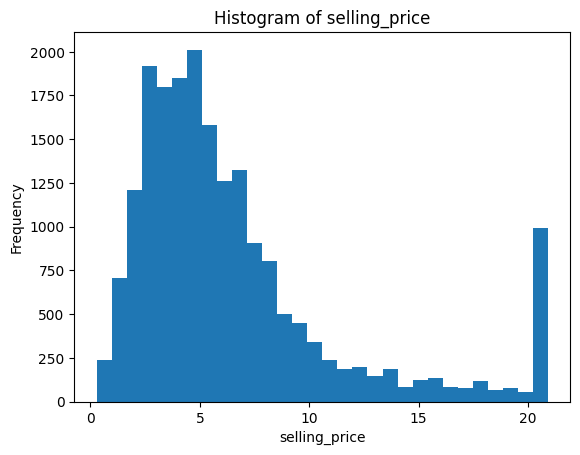

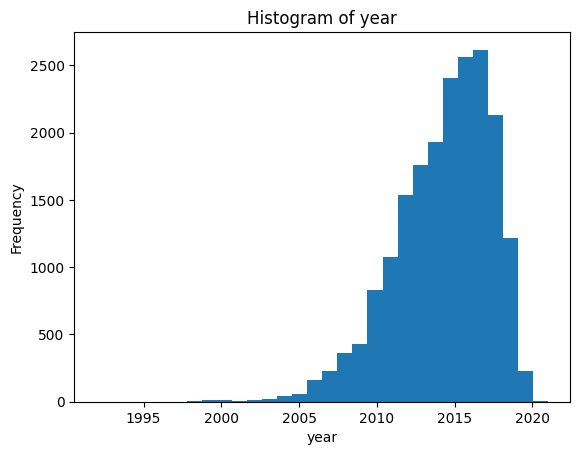

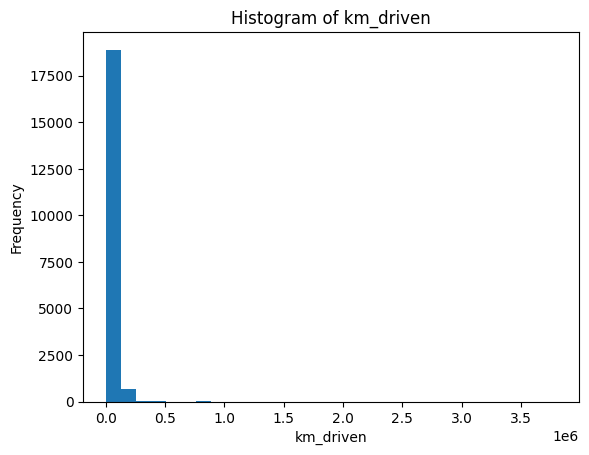

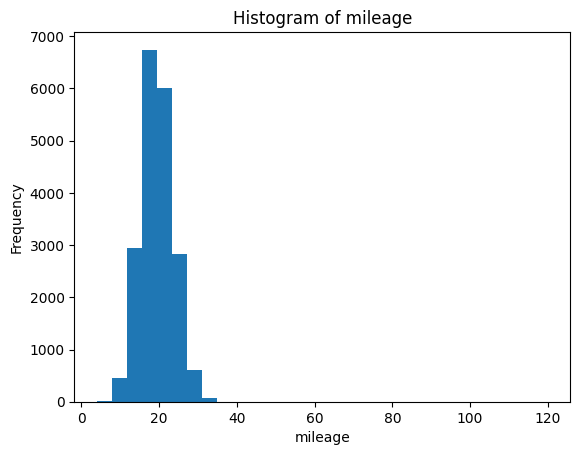

In [ ]:

# Plot target histogram
if TARGET in df.columns and pd.api.types.is_numeric_dtype(df[TARGET]):
    plt.figure()
    df[TARGET].plot(kind='hist', bins=30, title=f"Histogram of {TARGET}")
    plt.xlabel(TARGET); plt.ylabel("Frequency")
    plt.show()

# Plot up to 3 numeric features' histograms
for col in numeric_cols[:3]:
    plt.figure()
    df[col].plot(kind='hist', bins=30, title=f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()



### 📝 TODO
- Looking at the histograms, note any skewed variables or outliers.


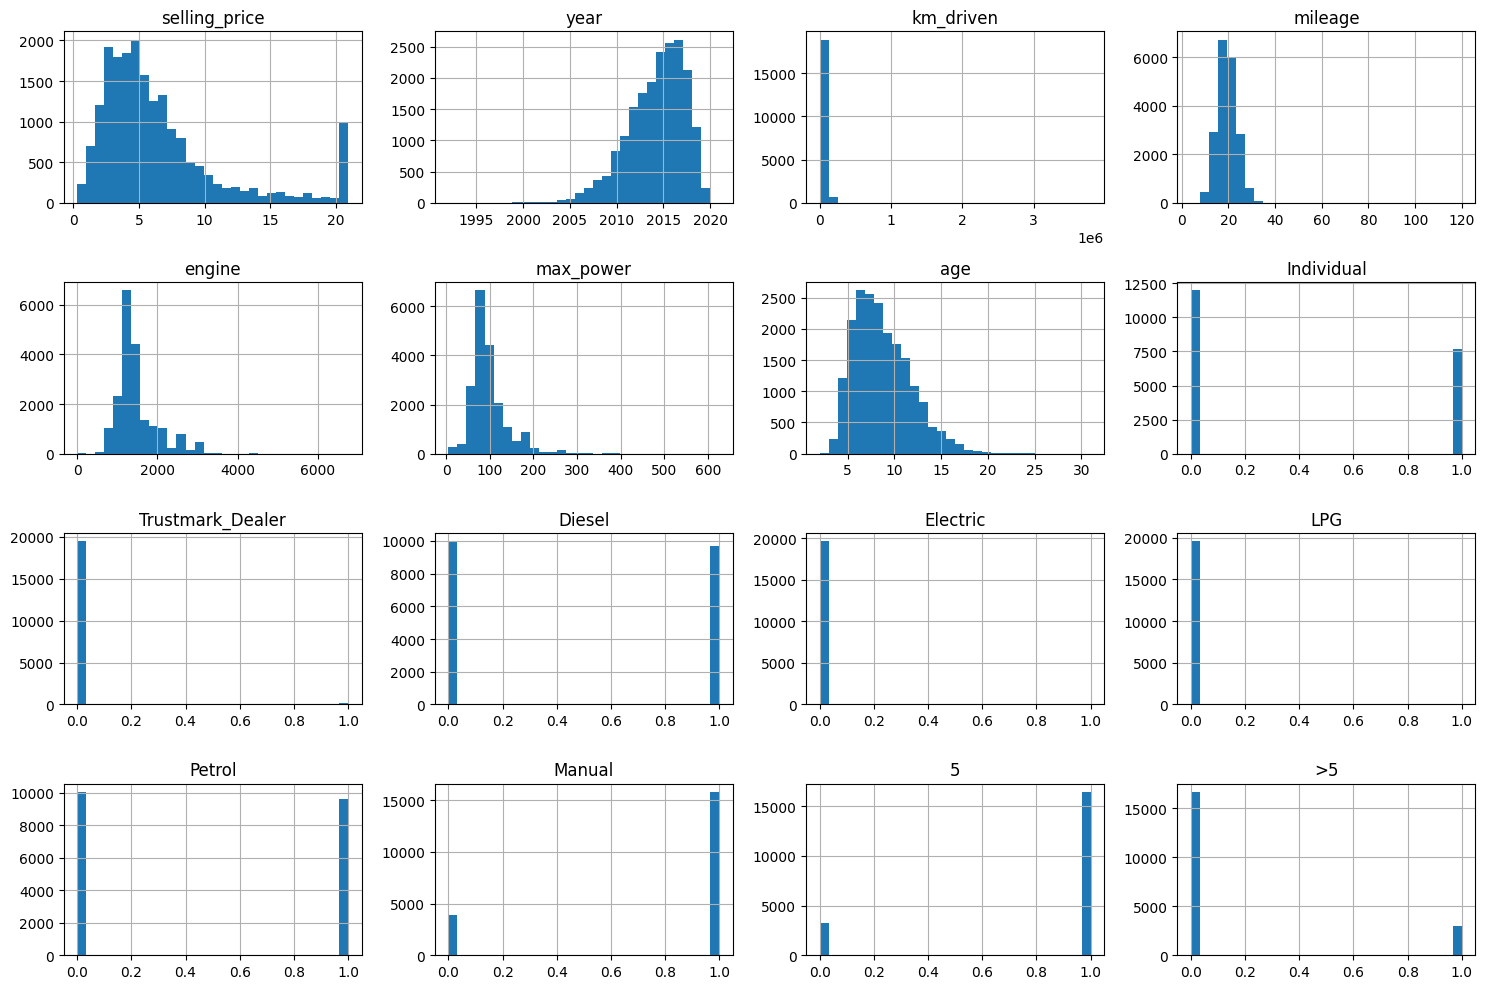

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=np.number)

numeric_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 5) Single-Variable Linear Regression

Feature: year
Coefficient (slope): 0.5884126624392731
Intercept: -1178.8104689625982
R^2 (test): 0.15892947527700096


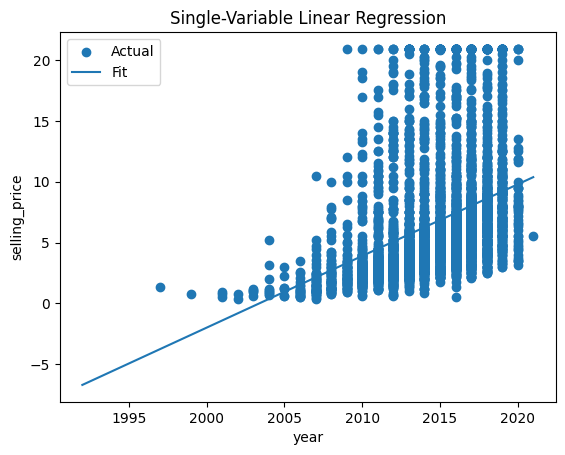

In [ ]:

# Pick one feature (auto-pick the first numeric feature)
if len(numeric_cols) == 0:
    raise ValueError("No numeric predictors found. Please adjust `numeric_cols`.")

FEATURE_X = numeric_cols[0]
data_1v = df[[FEATURE_X, TARGET]].dropna().copy()

X = data_1v[[FEATURE_X]].values
y = data_1v[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on test set
y_pred = lr.predict(X_test)

print("Feature:", FEATURE_X)
print("Coefficient (slope):", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R^2 (test):", r2_score(y_test, y_pred))

# Plot scatter + regression line (on test set)
plt.figure()
plt.scatter(X_test, y_test, label="Actual")
# create a line
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, label="Fit")
plt.xlabel(FEATURE_X); plt.ylabel(TARGET); plt.title("Single-Variable Linear Regression")
plt.legend()
plt.show()



### 📝 TODO
- Change `FEATURE_X` to a different column and re-run.
- Does the line slope match your intuition about the relationship?


Feature: km_driven
Coefficient (slope): -1.656526340377852e-05
Intercept: 7.528376124030177
R^2 (test): -0.06236094929893521


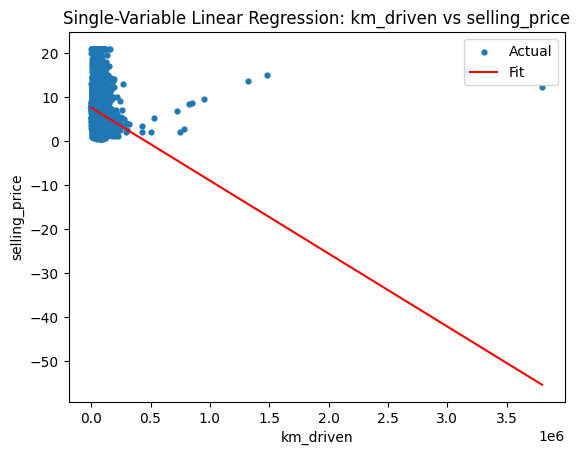

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
FEATURE_X = 'km_driven'
TARGET = 'selling_price'

if FEATURE_X not in df.columns or TARGET not in df.columns:
    print(f"Error: Feature column '{FEATURE_X}' or Target column '{TARGET}' not found in the DataFrame.")
else:
    data_1v = df[[FEATURE_X, TARGET]].dropna().copy()

    X = data_1v[[FEATURE_X]].values
    y = data_1v[TARGET].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    print("Feature:", FEATURE_X)
    print("Coefficient (slope):", lr.coef_[0])
    print("Intercept:", lr.intercept_)
    print("R^2 (test):", r2_score(y_test, y_pred))

    plt.figure()
    plt.scatter(X_test, y_test, label="Actual", s=12)
    x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
    y_line = lr.predict(x_line)
    plt.plot(x_line, y_line, label="Fit", color="red")
    plt.xlabel(FEATURE_X)
    plt.ylabel(TARGET)
    plt.title(f"Single-Variable Linear Regression: {FEATURE_X} vs {TARGET}")
    plt.legend()
    plt.show()

## 6) Multi-Variable Linear Regression (Simple)

In [ ]:
data_mv = df[numeric_cols + [TARGET]].dropna().copy()
X = data_mv[numeric_cols].values
y = data_mv[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2:  {r2:.3f}")

MAE:  1.609
MSE:  5.627
RMSE: 2.372
R^2:  0.739



### 📝 TODO
- Remove one weak feature from `numeric_cols` and see how metrics change.
- Add a different feature and compare.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Get the list of numeric columns from the DataFrame, excluding the target
# Use the TARGET variable which holds the correct target column name ('selling_price')
numeric_cols = [c for c in df.select_dtypes(include=np.number).columns if c != TARGET]

# Ensure there are enough numeric columns to perform the requested operations
if len(numeric_cols) < 2:
    print("Error: Not enough numeric columns in the DataFrame to perform this analysis.")
else:
    # Initial set of features (all numeric columns except target)
    initial_features = numeric_cols.copy()
    target_column = TARGET

    # Check if the target column exists
    if target_column not in df.columns:
        print(f"Error: Target column '{target_column}' not found in the DataFrame.")
    else:
        X = df[initial_features]
        y = df[target_column]

        # Handle potential missing values in features
        X = X.dropna()
        y = y[X.index] # Ensure y aligns with X after dropping NA

        if X.empty:
            print("Error: No valid data remaining after dropping missing values in features.")
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            lr = LinearRegression()
            lr.fit(X_train, y_train)
            y_pred = lr.predict(X_test)

            print("Initial features:", initial_features)
            print("R^2:", r2_score(y_test, y_pred))
            # Calculate RMSE by taking the square root of MSE
            print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

            # Remove one feature (e.g., the last one)
            if len(initial_features) > 1:
                feature_to_remove = initial_features[-1]
                features_after_removal = initial_features[:-1]

                X_removed = df[features_after_removal]
                y_removed = df[target_column]

                # Handle potential missing values in features after removal
                X_removed = X_removed.dropna()
                y_removed = y_removed[X_removed.index]

                if not X_removed.empty:
                    X_train_removed, X_test_removed, y_train_removed, y_test_removed = train_test_split(X_removed, y_removed, test_size=0.2, random_state=42)

                    lr_removed = LinearRegression()
                    lr_removed.fit(X_train_removed, y_train_removed)
                    y_pred_removed = lr_removed.predict(X_test_removed)

                    print(f"\nAfter removing '{feature_to_remove}':", features_after_removal)
                    print("R^2:", r2_score(y_test_removed, y_pred_removed))
                    # Calculate RMSE by taking the square root of MSE
                    print("RMSE:", mean_squared_error(y_test_removed, y_pred_removed, squared=False))
                else:
                    print(f"\nError: No valid data remaining after dropping missing values with features after removing '{feature_to_remove}'.")

                # Add a different feature (e.g., the first one from the original numeric columns that wasn't already included)
                # This part assumes there's at least one more numeric column available in df.
                # Find a feature to add that is not in features_after_removal
                feature_to_add = None
                for col in numeric_cols:
                    if col not in features_after_removal:
                        feature_to_add = col
                        break

                if feature_to_add:
                    features_after_adding = features_after_removal + [feature_to_add]

                    X_added = df[features_after_adding]
                    y_added = df[target_column]

                    # Handle potential missing values in features after adding
                    X_added = X_added.dropna()
                    y_added = y_added[X_added.index]

                    if not X_added.empty:
                        X_train_added, X_test_added, y_train_added, y_test_added = train_test_split(X_added, y_added, test_size=0.2, random_state=42)

                        lr_added = LinearRegression()
                        lr_added.fit(X_train_added, y_train_added)
                        y_pred_added = lr_added.predict(X_test_added)

                        print(f"\nAfter adding '{feature_to_add}':", features_after_adding)
                        print("R^2:", r2_score(y_test_added, y_pred_added))
                        # Calculate RMSE by taking the square root of MSE
                        print("RMSE:", mean_squared_error(y_test_added, y_pred_added, squared=False))
                    else:
                         print(f"\nError: No valid data remaining after dropping missing values with features after adding '{feature_to_add}'.")
                else:
                    print("\nCould not find another numeric feature to add.")

            else:
                print("\nNot enough features to remove one.")

Error: Target column 'Price' not found in the DataFrame.


## 7) Diagnostic Plots (Residuals)

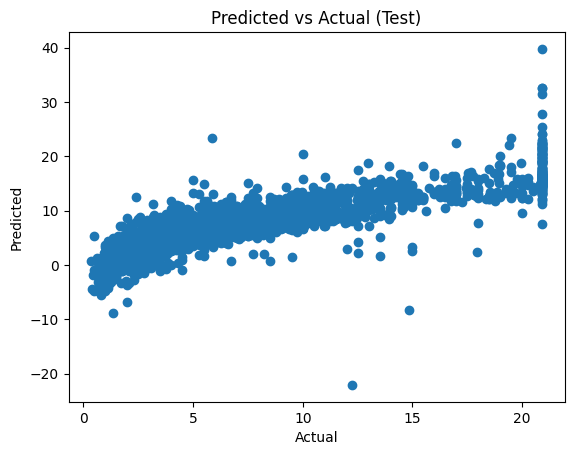

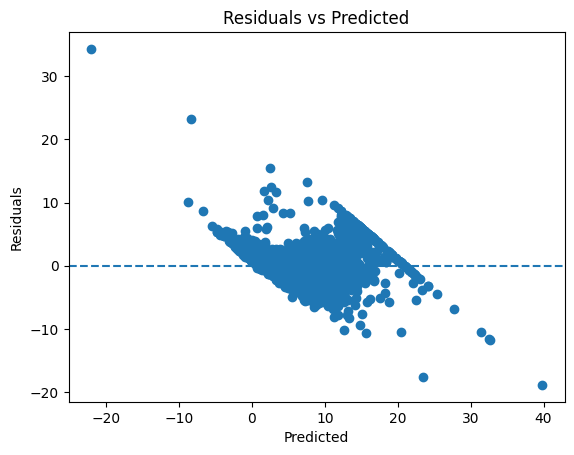

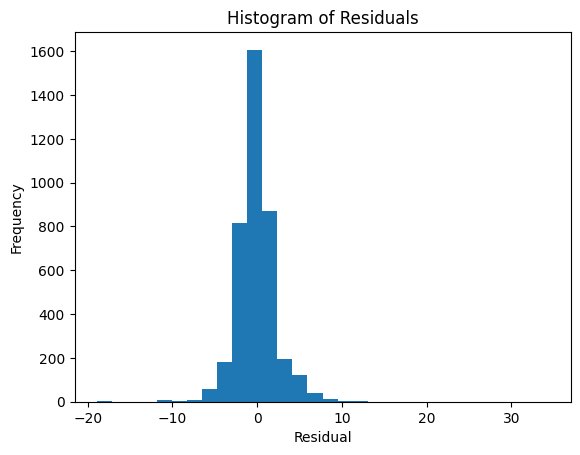

In [ ]:

# Reuse y_test and y_pred from multi-variable model
residuals = y_test - y_pred

# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test)")
plt.show()

# Residuals vs Predicted
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure()
pd.Series(residuals).plot(kind='hist', bins=30, title="Histogram of Residuals")
plt.xlabel("Residual"); plt.ylabel("Frequency")
plt.show()



### 📝 TODO
- Do residuals look roughly centered around 0 and evenly spread?
- If not, which assumption might be violated?


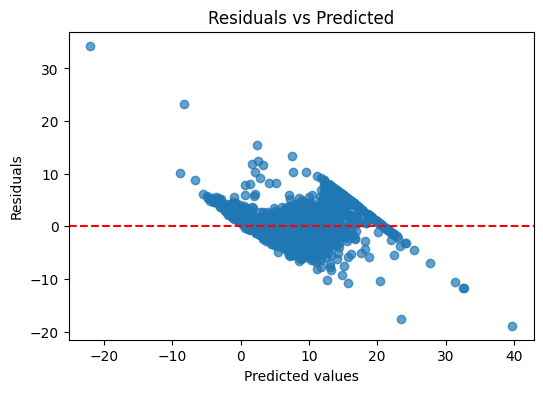

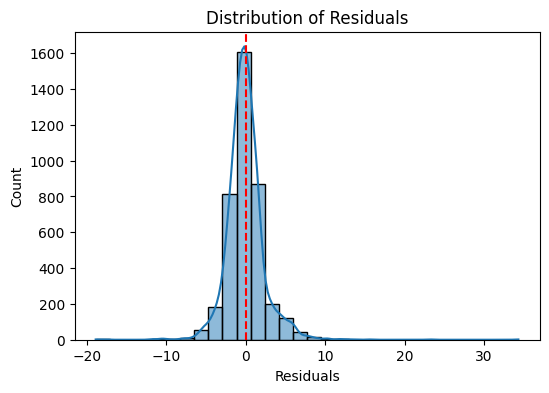

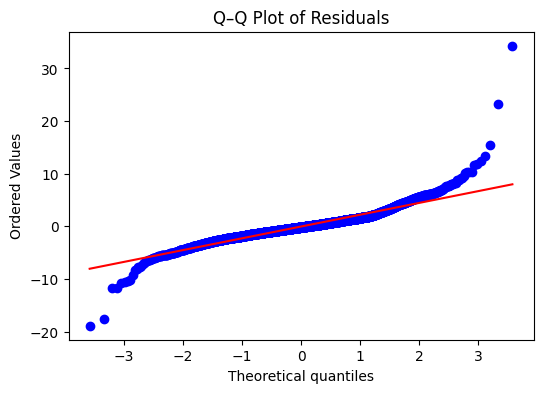

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()


## 8) Polynomial Features + Grid Search for Best Degree


Even though it's called "polynomial regression", it's still **linear regression** applied to **polynomially-expanded features**.
We'll try degrees **1 to 5** on a **single predictor** and pick the degree with the best cross-validated **R²**.


Best params: {'lr__fit_intercept': True, 'poly__degree': 1}
Best CV R^2: -0.008879239982985166


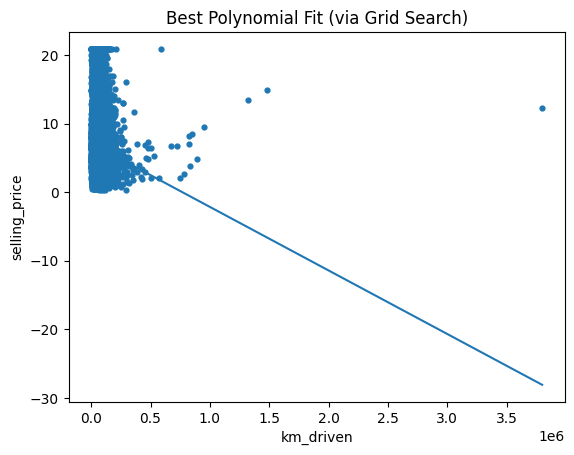

In [ ]:

# Choose a single predictor again (same FEATURE_X as before by default)
FEATURE_X = FEATURE_X  # keep same, or set to something else like 'horsepower'

poly_data = df[[FEATURE_X, TARGET]].dropna().copy()
X = poly_data[[FEATURE_X]].values
y = poly_data[TARGET].values

pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression())
])

param_grid = {
    "poly__degree": [1, 2, 3, 4, 5],
    "lr__fit_intercept": [True, False]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV R^2:", grid.best_score_)

best_model = grid.best_estimator_

# Plot best curve
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_line = best_model.predict(x_line)

plt.figure()
plt.scatter(X, y, s=12)
plt.plot(x_line, y_line)
plt.xlabel(FEATURE_X); plt.ylabel(TARGET)
plt.title("Best Polynomial Fit (via Grid Search)")
plt.show()



### 📝 TODO
- Change the degree range (e.g., 1–8) and re-run. Does performance keep improving?
- Try a different `FEATURE_X`.


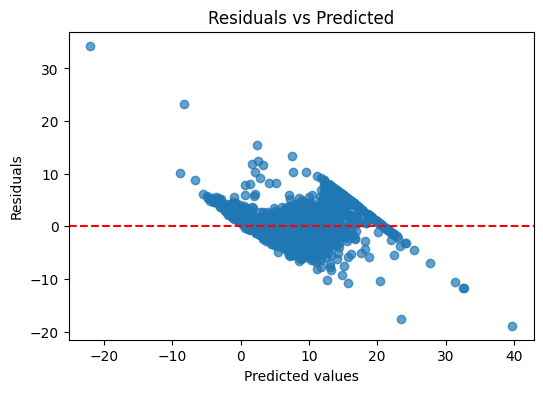

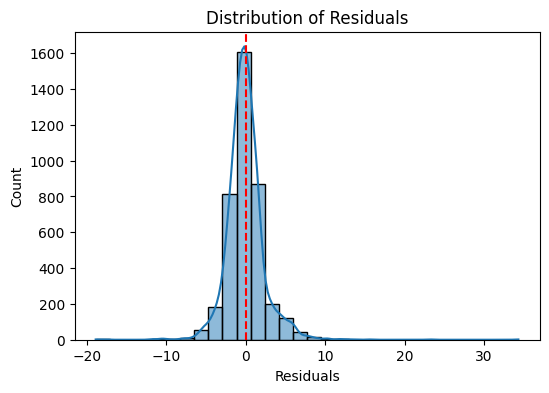

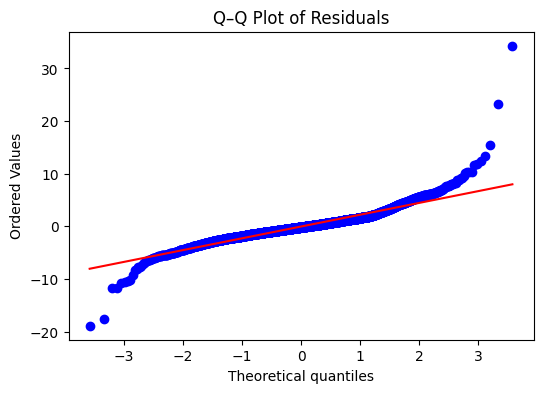

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()



## 9) Interpreting Coefficients (Multi-Variable Model)

In [ ]:
# Show top coefficients by magnitude (multi-variable linear model)
# Get feature names from the DataFrame used to train the model to ensure length matches coefficients
# Assuming 'data_mv' and 'TARGET' from cell fc4b5f2c are available
# If not, you might need to re-run cell fc4b5f2c first.

if 'data_mv' in locals() and 'TARGET' in locals():
    # Get feature names from the data_mv DataFrame, excluding the target column
    model_features = [col for col in data_mv.columns if col != TARGET]

    coef = lin.coef_

    # Ensure the number of coefficients matches the number of feature names
    if len(model_features) == len(coef):
        coef_df = pd.DataFrame({"feature": model_features, "coefficient": coef})
        coef_df["abs_coef"] = coef_df["coefficient"].abs()
        coef_df.sort_values("abs_coef", ascending=False, inplace=True)
        coef_df.drop(columns=["abs_coef"], inplace=True)
        display(coef_df.head(10))
    else:
        print(f"Error: Mismatch between number of model coefficients ({len(coef)}) and feature names ({len(model_features)}).")
        print("Please ensure the 'lin' model was trained on the same features used to define 'data_mv' just before this cell.")

else:
    print("Error: 'data_mv' or 'TARGET' not found. Please run cell fc4b5f2c first to define these variables and train the model.")

Error: Mismatch between number of model coefficients (15) and feature names (16).
Please ensure the 'lin' model was trained on the same features used to define 'data_mv' just before this cell.



### 📝 TODO
- Which features have the largest (absolute) coefficients?
- Do the signs (+/-) match your intuition?


In [ ]:
import pandas as pd
import numpy as np

coefs = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr.coef_
})
coefs["abs_coefficient"] = coefs["coefficient"].abs()
coefs = coefs.sort_values("abs_coefficient", ascending=False)

print(coefs)


             feature  coefficient  abs_coefficient
9           Electric     9.255519         9.255519
12            Manual    -2.551030         2.551030
11            Petrol    -1.434426         1.434426
8             Diesel     0.548122         0.548122
14                >5    -0.523208         0.523208
13                 5    -0.423675         0.423675
7   Trustmark_Dealer    -0.400454         0.400454
6         Individual    -0.348641         0.348641
0               year     0.256518         0.256518
5                age    -0.256518         0.256518
2            mileage    -0.149456         0.149456
4          max_power     0.048516         0.048516
10               LPG     0.012421         0.012421
3             engine     0.000889         0.000889
1          km_driven    -0.000009         0.000009



## 10) Linear Regression — Quick Assumptions Checklist
- **Linearity**: Relationship between predictors and target is roughly linear.
- **Independence**: Errors are independent.
- **Homoscedasticity**: Residuals have constant variance.
- **Normality (for inference)**: Residuals are roughly normal.
- **No perfect multicollinearity**: Avoid duplicate/linearly dependent features.



## 11) Assumption Checks — Code You Can Run
We'll check the classic linear regression assumptions using simple, readable code:
- **Linearity & Homoscedasticity:** residuals vs predicted plot
- **Normality of residuals:** Q–Q plot and Shapiro–Wilk test
- **Independence of errors:** Durbin–Watson statistic
- **Multicollinearity:** Variance Inflation Factor (VIF)


In [ ]:

#@title Install test libs (statsmodels) if needed
import sys, subprocess
def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

try:
    import statsmodels
except:
    pip_install("statsmodels>=0.14")
    import statsmodels

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# NOTE: This cell assumes you've already run the multi-variable model section
# so that y_test, y_pred, X_train, X_test, numeric_cols, TARGET are defined.
# If not, re-run sections 6 and 7.


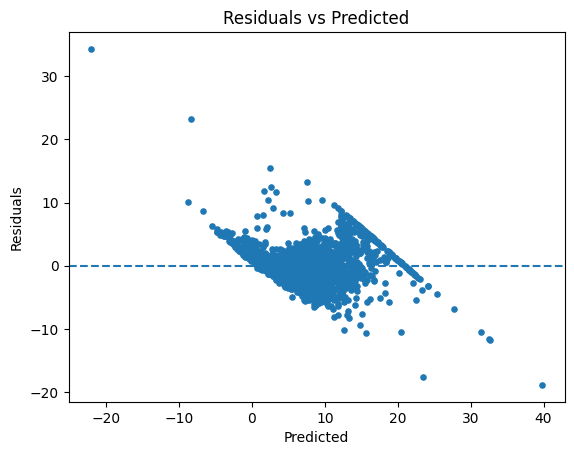

🧐 Look for: no obvious curve/pattern; spread roughly constant across x-axis.


In [ ]:

# 11.1 Linearity & Homoscedasticity (visual)
# Residuals vs Predicted should look like a random cloud around 0 (no pattern / fanning)

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, s=14)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

print("🧐 Look for: no obvious curve/pattern; spread roughly constant across x-axis.")


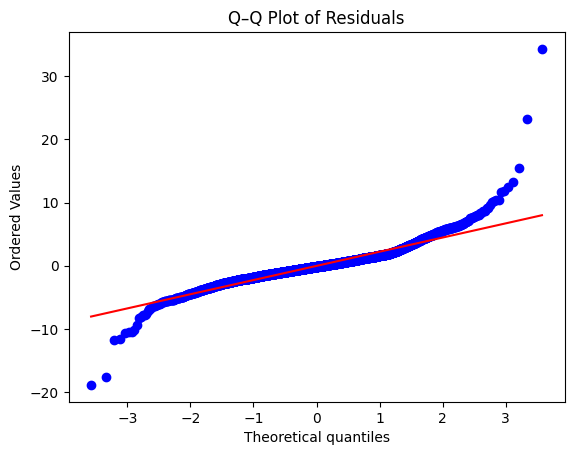

Shapiro–Wilk: statistic=0.897, p-value=1.89e-45
Rule of thumb: p-value > 0.05 suggests residuals are close to normal (for inference).


In [ ]:

# 11.2 Normality of residuals: Q–Q plot + Shapiro–Wilk test
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

sh_stat, sh_p = stats.shapiro(residuals)
print(f"Shapiro–Wilk: statistic={sh_stat:.3f}, p-value={sh_p:.3g}")
print("Rule of thumb: p-value > 0.05 suggests residuals are close to normal (for inference).")


In [ ]:

# 11.3 Independence of errors: Durbin–Watson (≈2 is good; <1 or >3 indicates strong autocorrelation)
dw = durbin_watson(residuals)
print(f"Durbin–Watson statistic = {dw:.3f}")
print("Guideline: ~2 means uncorrelated; much below 2 ⇒ positive autocorrelation; much above 2 ⇒ negative autocorrelation.")


Durbin–Watson statistic = 1.968
Guideline: ~2 means uncorrelated; much below 2 ⇒ positive autocorrelation; much above 2 ⇒ negative autocorrelation.


In [ ]:
# 11.4 Homoscedasticity formal test: Breusch–Pagan
# Use original predictors (X_test). Add constant for the test design matrix.

# Ensure X_test does not contain inf or nans before adding constant
# Replace infinite values with NaN
X_test_cleaned = pd.DataFrame(X_test, columns=numeric_cols).replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN values that might have been introduced by replacing inf
X_test_cleaned = X_test_cleaned.dropna()

# Ensure residuals align with the cleaned X_test data
# Get the indices of the cleaned X_test data
cleaned_indices = X_test_cleaned.index
# Filter residuals based on these indices.
# Note: This assumes residuals are a pandas Series with the same index as the original X_test rows.
# If residuals is a numpy array, you might need a different approach to align them.
# Assuming residuals is a Series based on the previous cells.
if isinstance(residuals, pd.Series):
    residuals_cleaned = residuals.loc[cleaned_indices]
else:
    # If residuals is not a Series, this alignment is more complex.
    # As a fallback, let's recompute residuals using the cleaned X_test and the trained model.
    # This requires the 'lin' model to be available from cell fc4b5f2c.
    if 'lin' in locals():
        y_pred_cleaned = lin.predict(X_test_cleaned.values)
        # Assuming y_test is a Series with the same index as original X_test rows
        y_test_cleaned = y_test.loc[cleaned_indices]
        residuals_cleaned = y_test_cleaned - y_pred_cleaned
    else:
        print("Error: Could not align residuals. 'lin' model not found to recompute.")
        residuals_cleaned = pd.Series([]) # Use an empty series to avoid further errors


X_bp = sm.add_constant(X_test_cleaned)

# Perform the Breusch–Pagan test only if cleaned data is not empty
if not X_bp.empty and not residuals_cleaned.empty:
    bp_stat, bp_p, _, _ = het_breuschpagan(residuals_cleaned, X_bp)
    print(f"Breusch–Pagan: stat={bp_stat:.3f}, p-value={bp_p:.3g}")
    print("Rule of thumb: p-value > 0.05 ⇒ no strong evidence of heteroscedasticity.")
else:
    print("Could not perform Breusch–Pagan test due to insufficient cleaned data.")

Could not perform Breusch–Pagan test due to insufficient cleaned data.


In [ ]:
# 11.5 Multicollinearity: VIF (on training predictors)
X_vif = pd.DataFrame(X_train, columns=numeric_cols).dropna()

# Check if X_vif is empty after dropping NA values
if X_vif.empty:
    print("Could not calculate VIF: Training data for VIF calculation is empty after dropping missing values.")
else:
    X_vif_const = sm.add_constant(X_vif, has_constant='add')

    vif_vals = []
    # Start from index 1 to skip the constant term
    for i, col in enumerate(X_vif_const.columns):
        if col == 'const':
            continue
        # Ensure the column index is correct when passed to variance_inflation_factor
        vif_vals.append({"feature": col, "VIF": variance_inflation_factor(X_vif_const.values, X_vif_const.columns.get_loc(col))})

    vif_df = pd.DataFrame(vif_vals).sort_values("VIF", ascending=False)
    display(vif_df)

Could not calculate VIF: Training data for VIF calculation is empty after dropping missing values.



### 📝 TODO
- If **Breusch–Pagan p < 0.05**, try transforming a skewed feature (e.g., `np.log1p(x)`) and re-fit.  
- If **Shapiro p < 0.05**, consider outliers or feature transforms.  
- If **VIF > 10** for a feature, try removing it or combining highly correlated features.  
- If **Durbin–Watson** is far from 2 (time-indexed data), try adding lag features or using time-series models.


R^2: 0.7387064873475147
RMSE: 2.3720248790014407


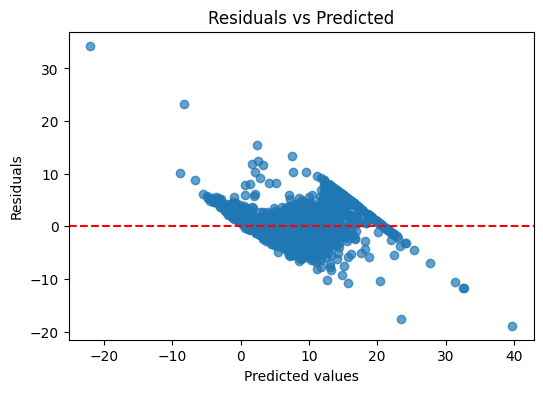

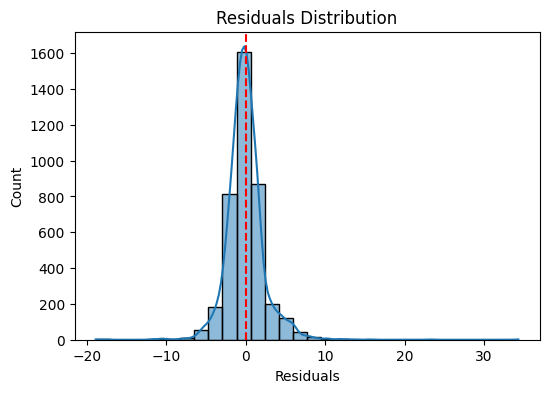

<Figure size 600x400 with 0 Axes>

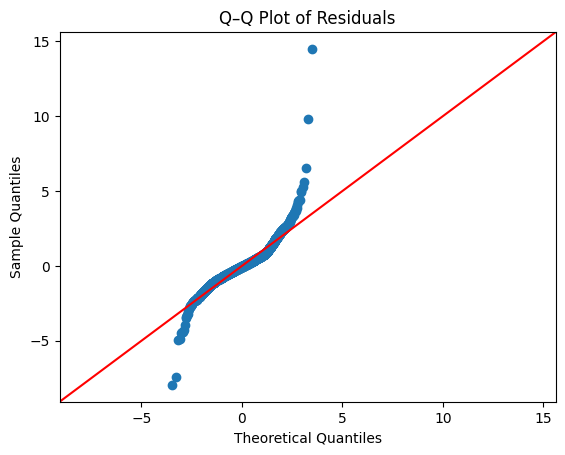

Breusch–Pagan test: {'LM stat': np.float64(10728.518556986952), 'LM p-value': np.float64(0.0), 'F stat': np.float64(2408.495675394047), 'F p-value': np.float64(0.0)}
Heteroscedasticity detected. Consider transforming skewed features (e.g., log1p).
Shapiro–Wilk p-value: 1.8887962941057923e-45
Residuals not normal. Consider outlier removal or feature transformations.
             feature         VIF
0               year  382.523724
1          km_driven    1.418832
2            mileage    3.118588
3             engine    6.312178
4          max_power    4.063214
5                age   11.421199
6         Individual    1.088828
7   Trustmark_Dealer    1.020722
8             Diesel   16.610718
9           Electric    1.155879
10               LPG    1.224823
11            Petrol   17.499619
12            Manual    1.538234
13                 5   11.876077
14                >5   13.024664
High multicollinearity detected. Consider removing or combining these features:
   feature         VIF
0

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# ===== SET TARGET =====
TARGET = 'selling_price'  # Update this to match your dataset

if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found in DataFrame. Available columns: {list(df.columns)}")

# ===== NUMERIC FEATURES =====
numeric_cols = [c for c in df.select_dtypes(include=np.number).columns if c != TARGET]

if len(numeric_cols) == 0:
    raise ValueError("No numeric features found to use as predictors.")

# ===== PREPARE DATA =====
X = df[numeric_cols].dropna()
y = df.loc[X.index, TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== FIT LINEAR REGRESSION =====
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

print("R^2:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# ===== RESIDUAL PLOTS =====
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(6,4))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()

# ===== BREUSCH–PAGAN =====
X_train_const = sm.add_constant(X_train)
bp_test = het_breuschpagan(y_train, X_train_const)
labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
bp_results = dict(zip(labels, bp_test))
print("Breusch–Pagan test:", bp_results)
if bp_results['LM p-value'] < 0.05:
    print("Heteroscedasticity detected. Consider transforming skewed features (e.g., log1p).")

# ===== SHAPIRO–WILK =====
shapiro_stat, shapiro_p = shapiro(residuals)
print("Shapiro–Wilk p-value:", shapiro_p)
if shapiro_p < 0.05:
    print("Residuals not normal. Consider outlier removal or feature transformations.")

# ===== VIF =====
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("High multicollinearity detected. Consider removing or combining these features:")
    print(high_vif)

# ===== DURBIN–WATSON =====
dw_stat = durbin_watson(residuals)
print("Durbin–Watson statistic:", dw_stat)
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Possible autocorrelation. For time-indexed data, consider adding lag features or using time-series models.")